In [1]:
CREDITS_PATH = r'..\data\raw\tmdb_5000_credits.csv'
MOVIES_PATH = r'..\data\raw\tmdb_5000_movies.csv'

OUTPUT_PATH = r'..\data\processed\selected_features.csv'

# importing


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies_df = pd.read_csv(MOVIES_PATH)
credits_df = pd.read_csv(CREDITS_PATH)

# let's first merge the two data sets


In [4]:
movies_df['movie_id'] = movies_df['id']

In [5]:
movies_df.drop('id', axis=1, inplace=True)

In [6]:
full_df = movies_df.merge(credits_df, on='movie_id')

In [7]:
# full_df.head(1)

In [8]:
full_df.drop('title_y', axis=1, inplace=True)

### 1) missing values


In [9]:
full_df.isna().sum().sort_values(ascending=False) / len(full_df) * 100

homepage                64.355611
tagline                 17.572351
overview                 0.062461
runtime                  0.041641
release_date             0.020820
budget                   0.000000
spoken_languages         0.000000
cast                     0.000000
movie_id                 0.000000
vote_count               0.000000
vote_average             0.000000
title_x                  0.000000
status                   0.000000
revenue                  0.000000
genres                   0.000000
production_countries     0.000000
production_companies     0.000000
popularity               0.000000
original_title           0.000000
original_language        0.000000
keywords                 0.000000
crew                     0.000000
dtype: float64

In [10]:
full_df['homepage']

0                             http://www.avatarmovie.com/
1            http://disney.go.com/disneypictures/pirates/
2             http://www.sonypictures.com/movies/spectre/
3                      http://www.thedarkknightrises.com/
4                    http://movies.disney.com/john-carter
                              ...                        
4798                                                  NaN
4799                                                  NaN
4800    http://www.hallmarkchannel.com/signedsealeddel...
4801                          http://shanghaicalling.com/
4802                                                  NaN
Name: homepage, Length: 4803, dtype: object

In [11]:
full_df['tagline']

0                             Enter the World of Pandora.
1          At the end of the world, the adventure begins.
2                                   A Plan No One Escapes
3                                         The Legend Ends
4                    Lost in our world, found in another.
                              ...                        
4798    He didn't come looking for trouble, but troubl...
4799    A newlywed couple's honeymoon is upended by th...
4800                                                  NaN
4801                             A New Yorker in Shanghai
4802                                                  NaN
Name: tagline, Length: 4803, dtype: object

In [12]:
full_df.drop(['tagline', 'homepage'], axis=1, inplace=True)

In [13]:
full_df.isna().sum().sort_values(ascending=False) / len(full_df) * 100

overview                0.062461
runtime                 0.041641
release_date            0.020820
budget                  0.000000
cast                    0.000000
movie_id                0.000000
vote_count              0.000000
vote_average            0.000000
title_x                 0.000000
status                  0.000000
spoken_languages        0.000000
revenue                 0.000000
genres                  0.000000
production_countries    0.000000
production_companies    0.000000
popularity              0.000000
original_title          0.000000
original_language       0.000000
keywords                0.000000
crew                    0.000000
dtype: float64

In [14]:
full_df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [15]:
full_df.dropna(inplace=True)

In [16]:
full_df.isna().sum().sort_values(ascending=False) / len(full_df) * 100

budget                  0.0
genres                  0.0
cast                    0.0
movie_id                0.0
vote_count              0.0
vote_average            0.0
title_x                 0.0
status                  0.0
spoken_languages        0.0
runtime                 0.0
revenue                 0.0
release_date            0.0
production_countries    0.0
production_companies    0.0
popularity              0.0
overview                0.0
original_title          0.0
original_language       0.0
keywords                0.0
crew                    0.0
dtype: float64

### 2)select Features


In [17]:
full_df.head(1)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title_x,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [18]:
full_df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title_x', 'vote_average', 'vote_count',
       'movie_id', 'cast', 'crew'],
      dtype='object')

In [19]:
selected_df = full_df[['movie_id', 'title_x', 'overview', 'release_date',
                       'runtime', 'genres', 'cast', 'crew', 'keywords', 'vote_average', 'vote_count']]

In [20]:
selected_df = selected_df.rename(columns={'title_x': 'title'})

### 2) correct data types


In [21]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      4799 non-null   int64  
 1   title         4799 non-null   object 
 2   overview      4799 non-null   object 
 3   release_date  4799 non-null   object 
 4   runtime       4799 non-null   float64
 5   genres        4799 non-null   object 
 6   cast          4799 non-null   object 
 7   crew          4799 non-null   object 
 8   keywords      4799 non-null   object 
 9   vote_average  4799 non-null   float64
 10  vote_count    4799 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 449.9+ KB


In [22]:
selected_df['movie_id'] = selected_df['movie_id'].astype('object')

In [23]:
selected_df['release_date'] = pd.to_datetime(selected_df['release_date'])

In [24]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      4799 non-null   object        
 1   title         4799 non-null   object        
 2   overview      4799 non-null   object        
 3   release_date  4799 non-null   datetime64[ns]
 4   runtime       4799 non-null   float64       
 5   genres        4799 non-null   object        
 6   cast          4799 non-null   object        
 7   crew          4799 non-null   object        
 8   keywords      4799 non-null   object        
 9   vote_average  4799 non-null   float64       
 10  vote_count    4799 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 449.9+ KB


### 3)check for duplication


In [25]:
selected_df[selected_df.duplicated()]

,movie_id,title,overview,release_date,runtime,genres,cast,crew,keywords,vote_average,vote_count


### 4)Outliers


In [26]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      4799 non-null   object        
 1   title         4799 non-null   object        
 2   overview      4799 non-null   object        
 3   release_date  4799 non-null   datetime64[ns]
 4   runtime       4799 non-null   float64       
 5   genres        4799 non-null   object        
 6   cast          4799 non-null   object        
 7   crew          4799 non-null   object        
 8   keywords      4799 non-null   object        
 9   vote_average  4799 non-null   float64       
 10  vote_count    4799 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 449.9+ KB


In [27]:
selected_df.describe().T

,count,mean,std,min,25%,50%,75%,max
runtime,4799.0,106.903105,22.561305,0.0,94.0,103.0,118.0,338.0
vote_average,4799.0,6.094186,1.188340,0.0,5.6,6.2,6.8,10.0
vote_count,4799.0,690.789123,1234.941795,0.0,54.0,236.0,737.5,13752.0


<Axes: xlabel='vote_count', ylabel='Count'>

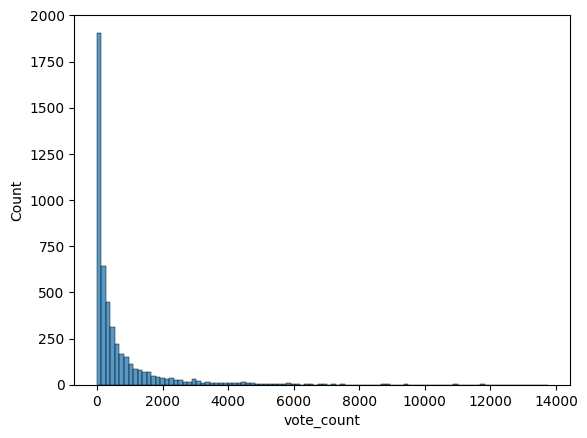

In [28]:
sns.histplot(selected_df['vote_count'], bins=100)

<Axes: xlabel='vote_average', ylabel='vote_count'>

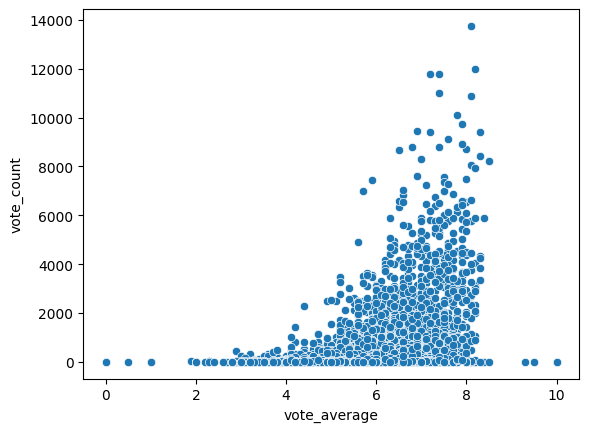

In [29]:
sns.scatterplot(data=selected_df, x='vote_average', y='vote_count')

In [30]:
selected_df[selected_df['vote_count'] > 12000]

,movie_id,title,overview,release_date,runtime,genres,cast,crew,keywords,vote_average,vote_count
65,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,2008-07-16,152.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...","[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",8.2,12002
96,27205,Inception,"Cobb, a skilled thief who commits corporate es...",2010-07-14,148.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...","[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...","[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",8.1,13752


In [31]:
# selected_df[selected_df['vote_count'] == 0]

**There are some outliers in vote count that can indicate movie popularity, so we will not remove them**


---


In [32]:
selected_df.to_csv(OUTPUT_PATH, index=False)